In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def powerlaw(b,n):
    """Returns a function which is a power law in one variable."""
    return lambda k : b*k**n

In [3]:
P = powerlaw(1,2)   # powerspectrum defined as a power law

In [4]:
shape = (128,128)
shape = (128,128,128)
K = np.meshgrid(*[np.arange(0, x-1) for x in shape])
# len(K)
K = np.indices(shape,dtype='float')  # K vector
k = (K**2).sum(axis=0)**(1/2)    # magnitude of K vector
# k.shape
Pk = P(k)
Pk[0,0] = 0

In [5]:
np.random.seed(840900)
FK = (np.random.randn(*shape) + np.random.randn(*shape)*1j) * np.sqrt(Pk/2)

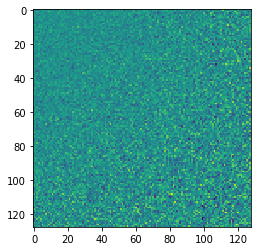

In [6]:
plt.imshow(np.real(FK[60]))
# plt.plot(Fx)

In [7]:
from scipy.fftpack import fftn, ifftn

In [8]:
FX = ifftn(FK)

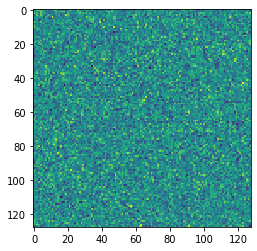

In [9]:
plt.imshow(np.real(FX[50]))
# plt.plot(np.real(Fk*np.conj(Fk)))

In [10]:
F1K = fftn(FX)
# plt.plot(k.ravel(),np.abs(F1K.ravel())**2,'.')

In [11]:
import pandas as pd

In [12]:
df = pd.DataFrame(data=np.vstack((k.ravel(),np.abs(F1K.ravel())**2)).T,columns=['k','Pk'])
df

,k,Pk
0,0.000000,1.135960e-27
1,1.000000,6.468659e-28
2,2.000000,7.699282e-28
3,3.000000,4.102077e-29
4,4.000000,2.303474e-28
...,...,...
2097147,217.685553,6.084575e+03
2097148,218.252148,2.505608e+04
2097149,218.821845,1.320556e+05
2097150,219.394622,1.214293e+05


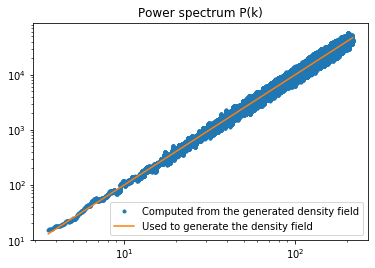

In [13]:
dfsort = df.sort_values('k')
k_av = dfsort['k'].rolling(100).mean()
Pdata_av = dfsort['Pk'].rolling(100).mean()
plt.plot(k_av,Pdata_av, '.',label='Computed from the generated density field')
plt.plot(k_av,P(k_av),'-',label='Used to generate the density field')
plt.xscale('log')
plt.yscale('log')
plt.ylim(bottom=10)
plt.title("Power spectrum P(k)")
plt.legend(loc="lower right")

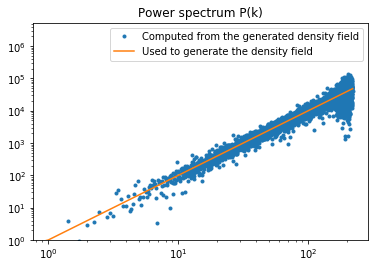

In [14]:
grouped1 = df.groupby('k').mean()
plt.plot(grouped1.index,grouped1,'.',label='Computed from the generated density field')
plt.plot(grouped1.index,P(grouped1.index),'-',label='Used to generate the density field')
plt.xscale('log')
plt.yscale('log')
plt.ylim(bottom=1)
plt.title("Power spectrum P(k)")
plt.legend()

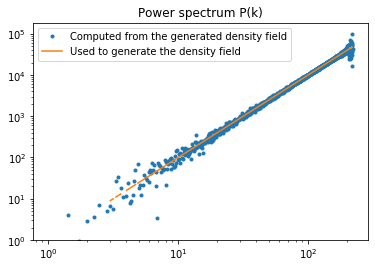

In [15]:
grouped2 = df.groupby(pd.cut(df['k'], bins=np.linspace(df['k'].iloc[0],df['k'].iloc[-1], 2000))).mean()
plt.plot(grouped2['k'],grouped2['Pk'],'.',label='Computed from the generated density field')
plt.plot(grouped2['k'],P(grouped2['k']),'-',label='Used to generate the density field')
plt.xscale('log')
plt.yscale('log')
plt.ylim(bottom=1)
plt.title("Power spectrum P(k)")
plt.legend()

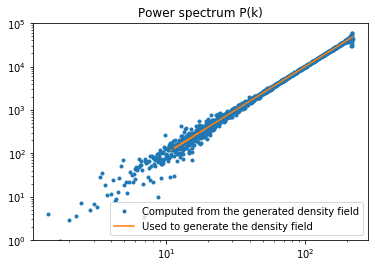

In [16]:
grouped3 = df.groupby(pd.cut(df['k'], bins=np.logspace(0.1,5, 5000))).mean()
plt.plot(grouped3['k'],grouped3['Pk'],'.',label='Computed from the generated density field')
plt.plot(grouped3['k'],P(grouped3['k']),'-',label='Used to generate the density field')
plt.xscale('log')
plt.yscale('log')
plt.ylim(bottom=1)
plt.title("Power spectrum P(k)")
plt.legend(loc="lower right")

In [17]:
from scipy.ndimage import correlate

In [18]:
# corr = correlate(np.abs(FX),np.abs(FX),mode='nearest')

In [19]:
# corr.shape

In [20]:
# plt.imshow(corr)

In [21]:
# Pcor = fftn(corr)

In [22]:
# plt.imshow(np.abs(Pcor))

In [23]:
# np.abs(Pcor)

In [24]:
%matplotlib inline

In [25]:
np.fft.fftfreq(10) * 10

array([ 0.,  1.,  2.,  3.,  4., -5., -4., -3., -2., -1.])

In [26]:
128*128

16384

In [27]:
# plot = plt.hist(np.real(F1K),bins=300)

In [28]:
# plt.hist(Fx,bins=30)

In [29]:
K[:,1,3,0]

array([1., 3., 0.])